<a href="https://colab.research.google.com/github/MuhammadNurilHuda/Materi/blob/main/mini-project/heart_attack_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"

In [ ]:
%cd /content/drive/MyDrive/Kaggle

/content/drive/MyDrive/Kaggle


In [ ]:
# !kaggle datasets download -d rashikrahmanpritom/heart-attack-analysis-prediction-dataset

In [ ]:
# !unzip \*.zip  && rm *.zip

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Kaggle/heart.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [ ]:
df.shape

(303, 14)

In [ ]:
X = df.drop('output', axis=1)
y = df['output']

X = StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [ ]:
# SVM
clf_svc = SVC(C=1, kernel='linear', gamma='scale')
clf_svc.fit(X_train, y_train)

# prediction result
y_pred = clf_svc.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8688524590163934


In [ ]:
# KNeighborsClassifier
clf_knn=KNeighborsClassifier(n_neighbors=2, algorithm='auto',weights='uniform', leaf_size=30)
clf_knn.fit(X_train, y_train)

# prediction result
y_pred = clf_knn.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.819672131147541


In [ ]:
# Random Forest
clf_rf=RandomForestClassifier(n_estimators=5, criterion='entropy', random_state=42, max_depth=6)
clf_rf.fit(X_train, y_train)

# prediction result
y_pred = clf_rf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.7704918032786885


In [ ]:
# Decision Tree
clf_dt=DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=6)
clf_dt.fit(X_train, y_train)

# prediction result
y_pred = clf_dt.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8688524590163934


In [ ]:
# Logistic Regression
clf_lr=LogisticRegression(C=2, solver='liblinear', multi_class='auto')
clf_lr.fit(X_train, y_train)

# prediction result
y_pred = clf_lr.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8524590163934426


In [ ]:
# Naive Bayes
clf_nb=GaussianNB()
clf_nb.fit(X_train, y_train)

# prediction result
y_pred = clf_nb.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8688524590163934


In [ ]:
from sklearn.model_selection import GridSearchCV

scores=[]
best_estimators = {}

model_params = {  
    
    'SVM': {
        'model': SVC(),
        'params': {
             'C': [0.1,1,2,3,4,5,6,7,8,9,10,100,1000],
             'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
             'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
        }
    },

    'KNeighborsClassifier': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [1,2,3,4,5,6,7,18,19,20],
            'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'weights' : ['uniform','distance'],
            'leaf_size' : [20,25,27,28,29,30,31,35]
        }
    },

    'RANDOM_FOREST':{
        'model' : RandomForestClassifier(),
        'params': {
            'n_estimators':[1,2,3,4,5,10,15,20,30,50,75,100],
            'criterion': ['entropy','gini'],
            'random_state' : [10,12,13,42,100],
            'max_depth' : [None,1,2,3,4,5,6,7,8,9,10]

        }
    },
    
    'DecisionTreeClassifier': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            'max_depth' : [None,1,2,3,4,5,6,7,8,9,10]
        }
    },
    
    'LOGISTIC_REGRESSION': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1,1,2,3,4,5,6,7,8,9,10,100,1000],
            'solver' : [ 'liblinear', 'lbfgs'],
            'multi_class' : ['auto', 'ovr' ]
        }
    },

    'GaussianNB': {
        'model': GaussianNB(),
        'params': {
            
        }
    }
    
}

In [ ]:
import time


for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    print(mp['model'], mp['params'])
    start_time = time.time()
    
    clf.fit(X_train, y_train)    
    

    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': str(clf.best_params_)
    })
    best_estimators[model_name] = clf.best_estimator_
    print('{} minutes'.format((time.time() - start_time)/60))

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) {'C': [0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100, 1000], 'kernel': ['rbf', 'linear', 'poly', 'sigmoid'], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
0.945376205444336 minutes
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 18, 19, 20], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'weights': ['uniform', 'distance'], 'leaf_size': [20, 25, 27, 28, 29, 30, 31, 35]}
0.16157857179641724 minutes
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       ma

In [ ]:
import pandas as pd    
df2 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df2 = df2.sort_values(by='best_score',ascending=False)
df2

,model,best_score,best_params
2,RANDOM_FOREST,0.847194,"{'criterion': 'gini', 'max_depth': 6, 'n_estim..."
1,KNeighborsClassifier,0.830612,"{'algorithm': 'auto', 'leaf_size': 20, 'n_neig..."
0,SVM,0.826446,"{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}"
4,LOGISTIC_REGRESSION,0.822109,"{'C': 2, 'multi_class': 'auto', 'solver': 'lib..."
5,GaussianNB,0.789031,{}
3,DecisionTreeClassifier,0.776786,"{'criterion': 'entropy', 'max_depth': None}"


In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(best_estimators['RANDOM_FOREST'],X_test,y_test,cv=5).mean()

0.785897435897436

In [ ]:
cross_val_score(best_estimators['KNeighborsClassifier'],X_test,y_test,cv=5).mean()

0.8371794871794872

In [ ]:
cross_val_score(best_estimators['SVM'],X_test,y_test,cv=5).mean()

0.8358974358974359

In [ ]:
cross_val_score(best_estimators['LOGISTIC_REGRESSION'],X_test,y_test,cv=5).mean()

0.8025641025641026

In [ ]:
cross_val_score(best_estimators['GaussianNB'],X_test,y_test,cv=5).mean()

0.8358974358974359

In [ ]:
cross_val_score(best_estimators['DecisionTreeClassifier'],X_test,y_test,cv=5).mean()

0.7743589743589744

In [ ]:
df2.best_params[2]

"{'criterion': 'gini', 'max_depth': 6, 'n_estimators': 15, 'random_state': 13}"

In [ ]:
# RANDOM FOREST
print(classification_report(y_test, clf_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        29
           1       0.78      0.78      0.78        32

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


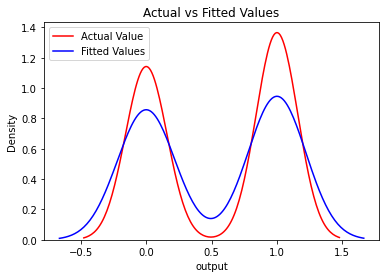

In [ ]:
ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(clf_rf.predict(X_test), hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values')

plt.legend()
plt.show()
plt.close()

In [ ]:
# KNClassifier
print(classification_report(y_test, clf_knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83        29
           1       0.92      0.72      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.84      0.82      0.82        61



In [ ]:
# SVM
print(classification_report(y_test, clf_svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [ ]:
# Logistic regression
print(classification_report(y_test, clf_lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [ ]:
# Naive bayes
print(classification_report(y_test, clf_nb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [ ]:
# Decission tree
print(classification_report(y_test, clf_dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [ ]:
cm = confusion_matrix(y_test, clf_rf.predict(X_test))
cm

array([[22,  7],
       [ 7, 25]])

In [ ]:
cm = confusion_matrix(y_test, clf_dt.predict(X_test))
cm

array([[26,  3],
       [ 5, 27]])

In [ ]:
class_dict = {'Normal':0, 'Prone to heart attack':1}

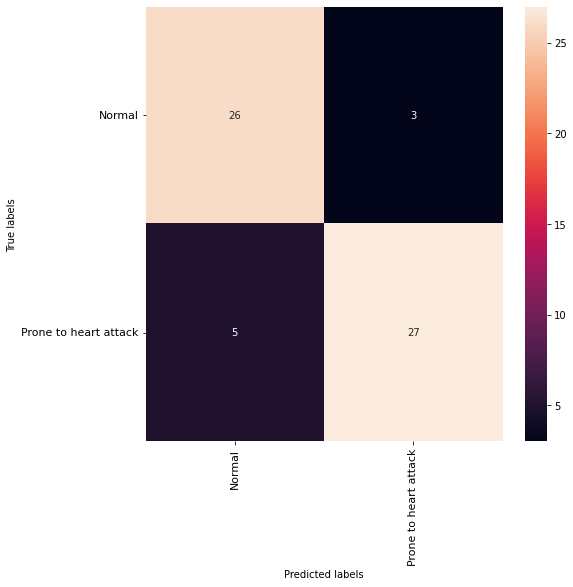

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8,8))

g = sns.heatmap(cm,annot=True,ax=ax)
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 11)
g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 11)
ax.xaxis.set_ticklabels(class_dict.keys()); ax.yaxis.set_ticklabels(class_dict.keys());
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');

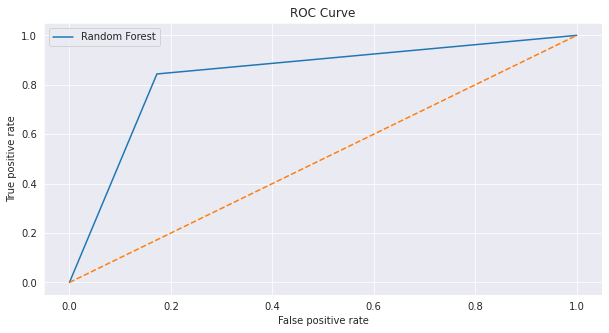

In [ ]:
from matplotlib import pyplot as plt
from sklearn import metrics

rf_false_positive_rate,rf_true_positive_rate,rf_threshold = metrics.roc_curve(y_test,best_estimators['RANDOM_FOREST'].predict(X_test))
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
plt.title('ROC Curve')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot([0,1],ls='--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

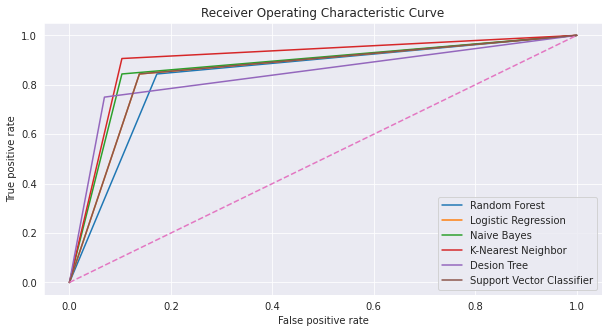

In [ ]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = metrics.roc_curve(y_test,best_estimators['LOGISTIC_REGRESSION'].predict(X_test))
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = metrics.roc_curve(y_test,best_estimators['GaussianNB'].predict(X_test))
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = metrics.roc_curve(y_test,best_estimators['RANDOM_FOREST'].predict(X_test))                                                             

knn_false_positive_rate,knn_true_positive_rate,knn_threshold = metrics.roc_curve(y_test,best_estimators['KNeighborsClassifier'].predict(X_test))
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = metrics.roc_curve(y_test,best_estimators['DecisionTreeClassifier'].predict(X_test))
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = metrics.roc_curve(y_test,best_estimators['SVM'].predict(X_test))


sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
plt.title('Receiver Operating Characteristic Curve')

plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')

plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [ ]:
X = df.drop('output', axis = 1)
y = df.output

from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('RandomForest', RandomForestClassifier(criterion='gini', max_depth=6, n_estimators=15,
                       random_state=13))])

pipe.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('RandomForest',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=6, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=15, n_jobs=None,
                                        oob_score=False, random_state=13,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [ ]:
test = np.array([41,0,1,130,204,0,0,172,0,1.4,2,0,2])
pipe.predict(test.reshape(1,-1))

array([1])

In [ ]:
import joblib 
joblib.dump(pipe, 'model.sav')

['model.sav']

In [ ]:
import json
with open("heart_class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))